### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


from sklearn.cluster import KMeans

from textwrap import wrap

### Load Dataset

In [4]:
DT_DEPTH_LIMIT = 20
RANDOM_SEED = 25


columns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness',
           'Concavity','Concave_Points','Symmetry','Fractal_Dimension',
           'Malignant/Benign']

# Read CSV file into pandas df
df = pd.read_csv('../datasets/breast_cancer/breast-cancer-wisconsin.csv',
                 delimiter=',', quotechar='"', names=columns)

### Preprocessing, Training Testing Split 

In [5]:
# Shuffle
df = shuffle(df, random_state=RANDOM_SEED)

# DROP USELESS ROWS AND COLUMNS
df.dropna(inplace=True)
cols = [0]
# Drop ID column (it's not attribute or target)
df.drop(df.columns[cols],axis=1,inplace=True)
# Drop all data points with missing variables  (denoted by '?' entry)
nostrings_row_list = [x.isdigit() for x in df.iloc[:,5]]
df = df[nostrings_row_list]


# Handle categorical data
df = pd.get_dummies(df)

print("Printing df.shape after handling categorical data: ", df.shape)

# Split data into X and y vectors
X = df.ix[:, df.columns != 'Malignant/Benign']
y = df['Malignant/Benign']

# Change 2 -> 0 (benign) and 4 -> 1 (malignant)
y.replace(2, 0, inplace=True)
y.replace(4, 1, inplace=True)

# Split into 30%  training data, 70% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=RANDOM_SEED)


# Apply scaling. Large values of certain features undesireable for NN
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Printing df.shape after handling categorical data:  (683, 19)


/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/saksham/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


### Run Neural Network (without dimensionality reduction)

training_set_max_size: 478 

activation: relu
learning a neural net with training_set_size=47
getting data
building net
training
validating
train_err: 0.0
test_err: 0.0851063829787234
---
activation: relu
learning a neural net with training_set_size=94
getting data
building net
training
validating
train_err: 0.010638297872340425
test_err: 0.07446808510638298
---
activation: relu
learning a neural net with training_set_size=141
getting data
building net
training
validating
train_err: 0.0
test_err: 0.04964539007092199
---
activation: relu
learning a neural net with training_set_size=188
getting data
building net
training
validating
train_err: 0.0
test_err: 0.047872340425531915
---
activation: relu
learning a neural net with training_set_size=235
getting data
building net
training
validating
train_err: 0.00425531914893617
test_err: 0.04390243902439024
---
activation: relu
learning a neural net with training_set_size=282
getting data
building net
training
validating
train_err: 0.0035460992

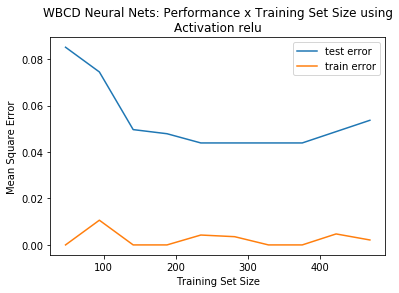

plot complete
activation: logistic
learning a neural net with training_set_size=47
getting data
building net
training
validating
train_err: 0.02127659574468085
test_err: 0.02127659574468085
---
activation: logistic
learning a neural net with training_set_size=94
getting data
building net
training
validating
train_err: 0.031914893617021274
test_err: 0.0425531914893617
---
activation: logistic
learning a neural net with training_set_size=141
getting data
building net
training
validating
train_err: 0.02127659574468085
test_err: 0.0425531914893617
---
activation: logistic
learning a neural net with training_set_size=188
getting data
building net
training
validating
train_err: 0.015957446808510637
test_err: 0.03723404255319149
---
activation: logistic
learning a neural net with training_set_size=235
getting data
building net
training
validating
train_err: 0.02127659574468085
test_err: 0.02926829268292683
---
activation: logistic
learning a neural net with training_set_size=282
getting data


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err: 0.01276595744680851
test_err: 0.024390243902439025
---
plotting results


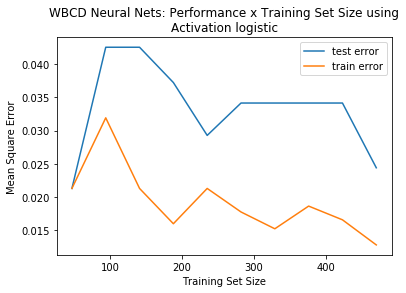

plot complete
activation: tanh
learning a neural net with training_set_size=47
getting data
building net
training
validating
train_err: 0.0
test_err: 0.0425531914893617
---
activation: tanh
learning a neural net with training_set_size=94
getting data
building net
training
validating
train_err: 0.0
test_err: 0.09574468085106383
---
activation: tanh
learning a neural net with training_set_size=141
getting data
building net
training
validating
train_err: 0.0
test_err: 0.04964539007092199
---
activation: tanh
learning a neural net with training_set_size=188
getting data
building net
training
validating
train_err: 0.0
test_err: 0.06914893617021277
---
activation: tanh
learning a neural net with training_set_size=235
getting data
building net
training
validating
train_err: 0.0
test_err: 0.05365853658536585
---
activation: tanh
learning a neural net with training_set_size=282
getting data
building net
training
validating
train_err: 0.0035460992907801418
test_err: 0.05365853658536585
---
activ

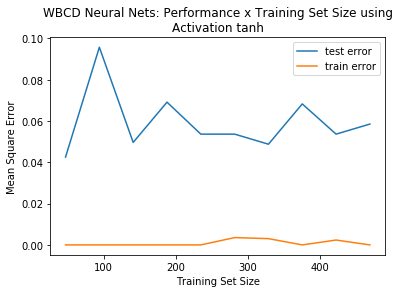

plot complete


In [6]:
# NNClassifier
train_size = len(X_train)
offsets = range(int(0.1 * train_size), int(train_size), int(0.1 * train_size))

start_time = time.time()

train_err = [0] * len(offsets)
test_err = [0] * len(offsets)

print('training_set_max_size:', train_size, '\n')

activation_functions = ['relu', 'logistic', 'tanh']

for activation in activation_functions:
    for i, o in enumerate(offsets):
        print('activation: ' + activation)
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data'),
        X_train_temp = X_train[:o].copy()
        y_train_temp = y_train[:o].copy()
        X_test_temp = X_test[:o].copy()
        y_test_temp = y_test[:o].copy()
        print('building net'),
        mlp = MLPClassifier(activation=activation, alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           # hidden_layer_sizes=(50, 25, 12),
           hidden_layer_sizes=(13, 13, 13),
           learning_rate='constant',
           learning_rate_init=0.001, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1)
        print('training'),
        mlp.fit(X_train,y_train)
        print('validating')
        train_err[i] = mean_squared_error(y_train_temp,
                    mlp.predict(X_train_temp))
        test_err[i] = mean_squared_error(y_test_temp,
                    mlp.predict(X_test_temp))

        # print(classification_report(y_train, mlp.predict(X_train)))
        # print(classification_report(y_test, mlp.predict(X_test)))

        print('train_err: ' + str(train_err[i]))
        print('test_err: ' + str(test_err[i]))
        print('---')

    # Plot results
    print('plotting results')
    plt.figure()
    title = 'WBCD Neural Nets: Performance x Training Set Size using Activation ' + activation
    plt.title('\n'.join(wrap(title,60)))
    # plt.subplots_adjust(top=0.85)
    plt.plot(offsets, test_err, '-', label='test error')
    plt.plot(offsets, train_err, '-', label='train error')
    plt.legend()
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Square Error')
    filename = 'wbcd' + activation + '_PerformancexTrainingSetSize.png'
    plt.show()
#     plt.savefig('plots/WBCD/NN/' + filename)
    print('plot complete')
    ### ---

### Dimensionality Reduction Before Training NN  (comment sections out as needed for experiments)

In [20]:
# USING PCA 

n_comp = 5 
pca = PCA(n_components=n_comp)
X_dim_reduced = pca.fit(X).transform(X)
print(pca.explained_variance_ratio_)

print("Printing X_dim_reduced...")
print(X_dim_reduced)


# Split into 30%  training data, 70% testing data
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_dim_reduced, y,
                                                    test_size=0.30, random_state=RANDOM_SEED)


# Apply scaling. Large values of certain features undesireable for NN
scaler = StandardScaler()
scaler.fit(X_train_dr)
X_train_dr = scaler.transform(X_train_dr)
X_test_dr = scaler.transform(X_train_dr)

[0.6943919  0.07395622 0.05952882 0.04877117 0.04402469]
Printing X_dim_reduced...
[[-4.7434279  -1.08196618 -0.07378399 -0.30841019  0.62702353]
 [-4.09575951 -1.83182431  0.10855599 -0.7258196   0.21829327]
 [10.43986046  0.34244016 -2.17452341 -1.9924894  -0.35400733]
 ...
 [-4.41658787 -1.94511079  0.02546406 -0.65961409  0.70202035]
 [-4.24209664  1.91942415 -0.31639195  1.67748745  0.44883327]
 [10.67359358  3.3460804   2.38923349  1.64026588  2.39851963]]


### Run clustering, append to the features for NN 

In [3]:

clf_kMeans = KMeans(n_clusters=2, random_state=0)
clf_kMeans.fit(X)

error = mean_squared_error(y, clf_kMeans.predict(X))

NameError: name 'X' is not defined

### Basic NN (Get it running with Dimnesionality Reduction)

In [25]:
mlp = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           # hidden_layer_sizes=(50, 25, 12),
           hidden_layer_sizes=(13, 13, 13),
           learning_rate='constant',
           learning_rate_init=0.001, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1)

mlp.fit(X_train_dr,y_train_dr)

print('validating')
trainingError_debug = mean_squared_error(y_train_temp_dr,
            mlp.predict(X_train_temp_dr))
testingError_debug = mean_squared_error(y_test_temp_dr,
            mlp.predict(X_test_temp_dr))

print("Training error: ", trainingError_debug)
print("Testing error: ", testingError_debug)


validating
Training error:  0.027659574468085105
Testing error:  0.02926829268292683


### Run Neural Network (after dimensionality reduction)

In [23]:
# NNClassifier
train_size = len(X_train_dr)
offsets = range(int(0.1 * train_size), int(train_size), int(0.1 * train_size))


train_err_dr = [0] * len(offsets)
test_err_dr = [0] * len(offsets)

print('training_set_max_size:', train_size, '\n')

activation_functions = ['relu', 'logistic', 'tanh']

for activation in activation_functions:
    for i, o in enumerate(offsets):
        print('activation: ' + activation)
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data'),
        X_train_temp_dr = X_train_dr[:o].copy()
        y_train_temp_dr = y_train_dr[:o].copy()
        X_test_temp_dr = X_test_dr[:o].copy()
        y_test_temp_dr = y_test_dr[:o].copy()
        print('building net'),
        mlp = MLPClassifier(activation=activation, alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=(13, 13, 13),
           learning_rate='constant',
           learning_rate_init=0.001, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1)
        print('training'),
        mlp.fit(X_train_dr,y_train_dr)
        print('validating')
        train_err_dr[i] = mean_squared_error(y_train_temp_dr,
                    mlp.predict(X_train_temp_dr))
        test_err_dr[i] = mean_squared_error(y_test_temp_dr,
                    mlp.predict(X_test_temp_dr))

        # print(classification_report(y_train, mlp.predict(X_train)))
        # print(classification_report(y_test, mlp.predict(X_test)))

        print('train_err_dr: ' + str(train_err_dr[i]))
        print('test_err_dr: ' + str(test_err_dr[i]))
        print('---')

#     # Plot results
#     print 'plotting results'
#     plt.figure()
#     title = 'WBCD Neural Nets: Performance x Training Set Size using Activation ' + activation
#     plt.title('\n'.join(wrap(title,60)))
#     # plt.subplots_adjust(top=0.85)
#     plt.plot(offsets, test_err, '-', label='test error')
#     plt.plot(offsets, train_err, '-', label='train error')
#     plt.legend()
#     plt.xlabel('Training Set Size')
#     plt.ylabel('Mean Square Error')
#     filename = 'wbcd' + activation + '_PerformancexTrainingSetSize.png'
#     plt.savefig('plots/WBCD/NN/' + filename)
#     print 'plot complete'
#     ### ---

training_set_max_size: 478 

activation: relu
learning a neural net with training_set_size=47
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.0
test_err_dr: 0.0425531914893617
---
activation: relu
learning a neural net with training_set_size=94
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.010638297872340425
test_err_dr: 0.06382978723404255
---
activation: relu
learning a neural net with training_set_size=141
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.014184397163120567
test_err_dr: 0.05673758865248227
---
activation: relu
learning a neural net with training_set_size=188
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.010638297872340425
test_err_dr: 0.05319148936170213
---
activation: relu
learning a neural net with training_set_size=235
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.01702127659574468
test_err_dr: 0.03902439024390244
---
activation: relu
learning a neural net with training_set_size=282
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.02127659574468085
test_err_dr: 0.03414634146341464
---
activation: relu
learning a neural net with training_set_size=329
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.015197568389057751
test_err_dr: 0.03902439024390244
---
activation: relu
learning a neural net with training_set_size=376
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.026595744680851064
test_err_dr: 0.03902439024390244
---
activation: relu
learning a neural net with training_set_size=423
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.018912529550827423
test_err_dr: 0.04390243902439024
---
activation: relu
learning a neural net with training_set_size=470
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.01702127659574468
test_err_dr: 0.03902439024390244
---
activation: logistic
learning a neural net with training_set_size=47
getting data
building net
training
validating
train_err_dr: 0.02127659574468085
test_err_dr: 0.02127659574468085
---
activation: logistic
learning a neural net with training_set_size=94
getting data
building net
training
validating
train_err_dr: 0.031914893617021274
test_err_dr: 0.05319148936170213
---
activation: logistic
learning a neural net with training_set_size=141
getting data
building net
training
validating
train_err_dr: 0.028368794326241134
test_err_dr: 0.0425531914893617
---
activation: logistic
learning a neural net with training_set_size=188
getting data
building net
training
validating
train_err_dr: 0.34574468085106386
test_err_dr: 0.3670212765957447
---
activation: logistic
learning a neural net with training_set_size=235
getting data
building net
training
validating
train_err_dr: 0.02553191489361702
test_err_dr: 0.0292682

/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.028368794326241134
test_err_dr: 0.02926829268292683
---
activation: logistic
learning a neural net with training_set_size=329
getting data
building net
training
validating
train_err_dr: 0.03343465045592705
test_err_dr: 0.03414634146341464
---
activation: logistic
learning a neural net with training_set_size=376
getting data
building net
training
validating
train_err_dr: 0.031914893617021274
test_err_dr: 0.03414634146341464
---
activation: logistic
learning a neural net with training_set_size=423
getting data
building net
training
validating
train_err_dr: 0.026004728132387706
test_err_dr: 0.02926829268292683
---
activation: logistic
learning a neural net with training_set_size=470
getting data
building net
training
validating
train_err_dr: 0.02553191489361702
test_err_dr: 0.02926829268292683
---
activation: tanh
learning a neural net with training_set_size=47
getting data
building net
training
validating
train_err_dr: 0.02127659574468085
test_err_dr: 0.0425531

/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.01276595744680851
test_err_dr: 0.02926829268292683
---
activation: tanh
learning a neural net with training_set_size=282
getting data
building net
training
validating
train_err_dr: 0.031914893617021274
test_err_dr: 0.02926829268292683
---
activation: tanh
learning a neural net with training_set_size=329
getting data
building net
training
validating
train_err_dr: 0.03343465045592705
test_err_dr: 0.03414634146341464
---
activation: tanh
learning a neural net with training_set_size=376
getting data
building net
training
validating
train_err_dr: 0.034574468085106384
test_err_dr: 0.03902439024390244
---
activation: tanh
learning a neural net with training_set_size=423
getting data
building net
training


/home/saksham/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


validating
train_err_dr: 0.026004728132387706
test_err_dr: 0.03414634146341464
---
activation: tanh
learning a neural net with training_set_size=470
getting data
building net
training
validating
train_err_dr: 0.031914893617021274
test_err_dr: 0.02926829268292683
---
